In [ ]:
#Colab only
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz

--2021-06-28 09:39:39--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.18.236, 2001:1458:201:ee::100:6
Connecting to root.cern.ch (root.cern.ch)|137.138.18.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’

root_v6.13.08.Linux 100%[===================>] 131.05M  29.8MB/s    in 5.1s    

2021-06-28 09:39:45 (25.9 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’ saved [137415272/137415272]



In [ ]:
#Colab only:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes


ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libPyROOT.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGpad.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 564df4862a00 at 7f9bd26c4150>

Welcome to JupyROOT 6.13/08


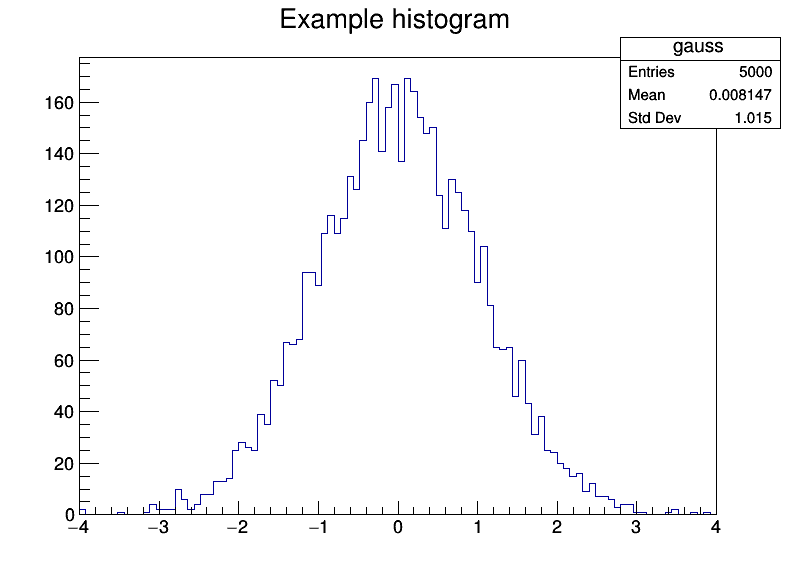

In [ ]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PX) TTree Float_t branch H1_PX will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PY) TTree Float_t branch H1_PY will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PZ) TTree Float_t branch H1_PZ will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3305139 out of range events


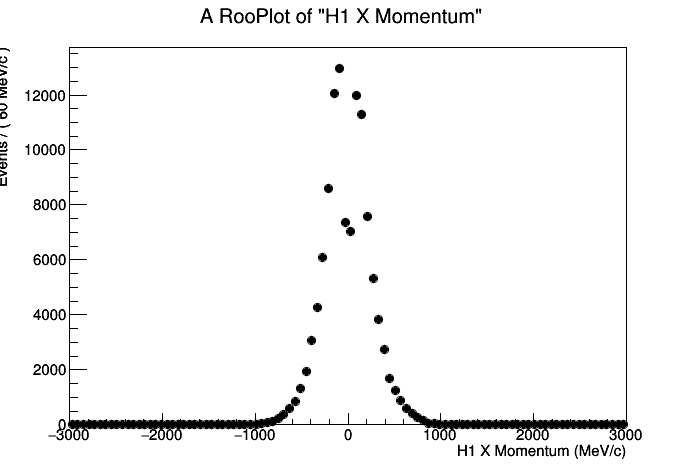

In [ ]:

#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("data")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

Making a plot for the total momentum 

[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_Ptot) TTree Float_t branch H1_Ptot will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H2_Ptot) TTree Float_t branch H2_Ptot will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H3_Ptot) TTree Float_t branch H3_Ptot will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 2792765 out of range events


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


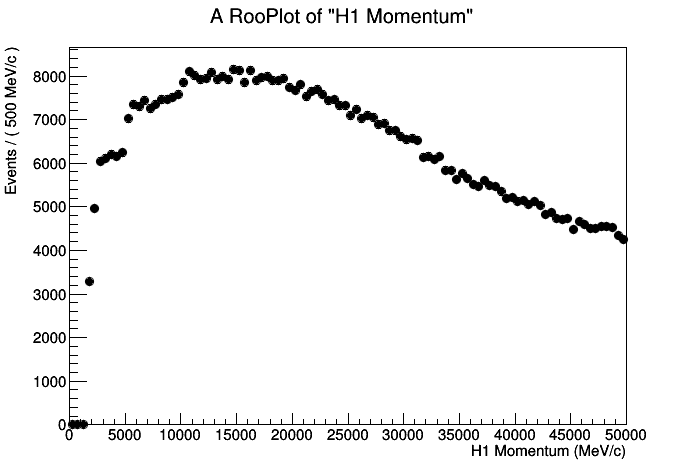

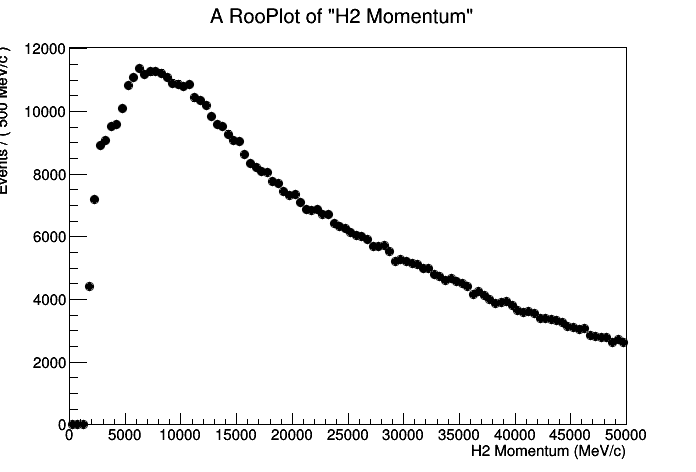

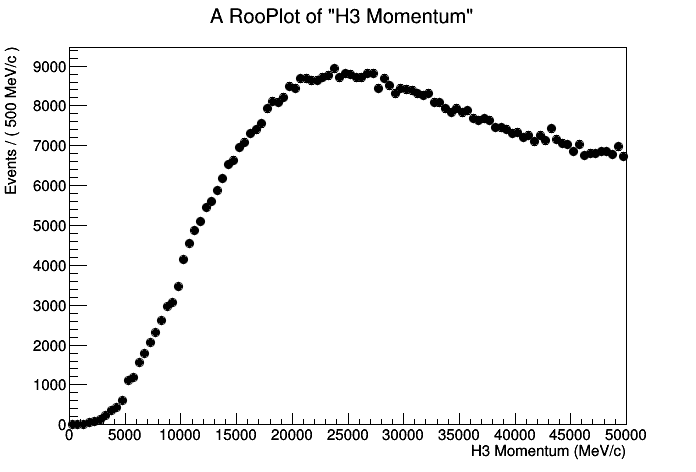

In [ ]:
#Here make a plot of the Total momentum of each of the three daughters
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.This is the command given to us at the start of this exercise.
f = ROOT.TFile.Open("/content/drive/MyDrive/B2HHH_MagnetUp.root", "READONLY")
#access the decaytree and extract it.
tree=f.Get("data")
#Now we can grab some variables as a test:
H1tot = ROOT.RooRealVar("H1_Ptot","H1 Momentum",0,50000,"MeV/c")
H2tot = ROOT.RooRealVar("H2_Ptot","H2 Momentum",0,50000,"MeV/c")
H3tot = ROOT.RooRealVar("H3_Ptot","H3 Momentum",0,50000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(H1tot,H2tot,H3tot), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it: do this for each H
a = ROOT.TCanvas("a","a")
frame1 = H1tot.frame()
data.plotOn(frame1)
frame1.Draw()
a.Draw()

b = ROOT.TCanvas("b","b")
frame2 = H2tot.frame()
data.plotOn(frame2)
frame2.Draw()
b.Draw()
c = ROOT.TCanvas("c","c")
frame3 = H3tot.frame()
data.plotOn(frame3)
frame3.Draw()
c.Draw()

Now we plot the total momentum for the mother particle the B meson. For this it was advised the histogram code should be used.


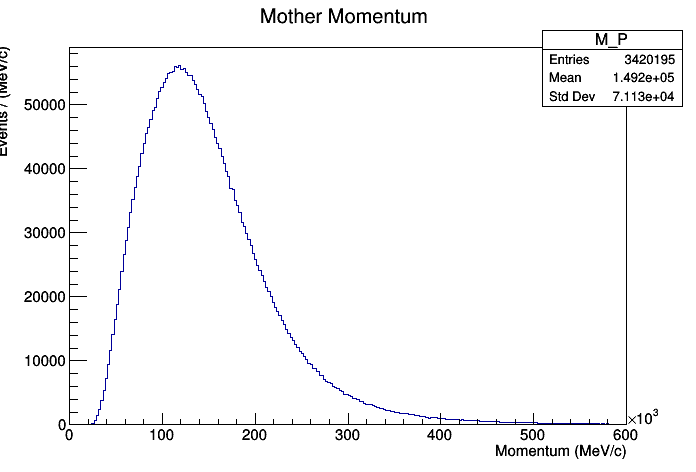

In [ ]:
mother_plot = ROOT.TCanvas("canvas")
tree.Draw("M_Ptot>>M_P(250, 0, 600000)")
M_P = ROOT.gDirectory.Get("M_P")
M_P.SetTitle("Mother Momentum")
M_P.SetXTitle("Momentum (MeV/c)")
M_P.SetYTitle("Events / (MeV/c)")
mother_plot.Draw()

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45



In [ ]:
tree.Show(45)

======> EVENT:45
 B_FlightDistance = 4.71407
 B_VertexChi2    = 11.5278
 H1_PX           = 133.376
 H1_PY           = -1293.52
 H1_PZ           = 33534.2
 H1_ProbK        = 0.00735235
 H1_ProbPi       = 0.204907
 H1_Charge       = 1
 H1_IPChi2       = 22.9885
 H1_isMuon       = 0
 H2_PX           = 518.943
 H2_PY           = -1966.2
 H2_PZ           = 52184.7
 H2_ProbK        = 0.00482044
 H2_ProbPi       = 0.266655
 H2_Charge       = -1
 H2_IPChi2       = 20.5652
 H2_isMuon       = 0
 H3_PX           = 1383.62
 H3_PY           = -2008.35
 H3_PZ           = 12154
 H3_ProbK        = 0.0800247
 H3_ProbPi       = 0.403711
 H3_Charge       = -1
 H3_IPChi2       = 1584.95
 H3_isMuon       = 0
 H1_Ptot         = 33559.4
 H1_type         = 1
 H1_E            = 33559.7
 H2_Ptot         = 52224.4
 H2_type         = 1
 H2_E            = 52224.5
 H3_Ptot         = 12396.2
 H3_type         = 1
 H3_E            = 12397
 M_Ptot          = 98035.7
 M_E             = 98181.3
 M_m0            = 5343.69

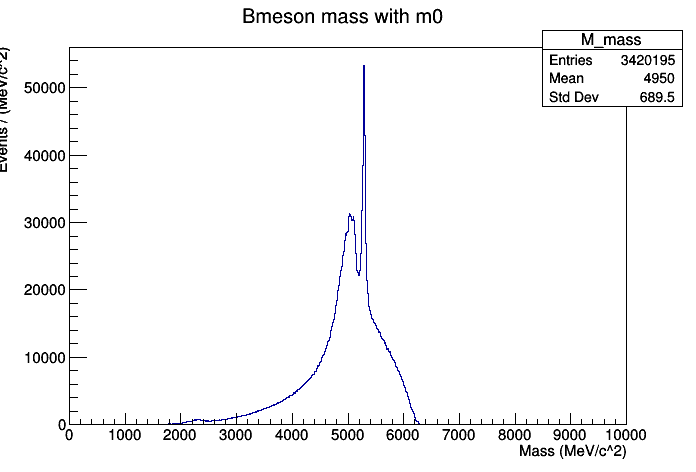

In [ ]:

#Now plot a histogram of the range of masses of the B meson.
#Does this match what we would expect from theory?

c1 = ROOT.TCanvas("canvas1")
tree.Draw("M_m0>>M_mass(1000, 0, 10000)")
M_mass = ROOT.gDirectory.Get("M_mass")
M_mass.SetTitle("Bmeson mass with m0")
M_mass.SetXTitle("Mass (MeV/c^2)")
M_mass.SetYTitle("Events / (MeV/c^2)")
c1.Draw()
#the theory says there should be a sharp peak at a particular mass and we see that around 5500 (meV/c^2), so yes it is correct with theory.

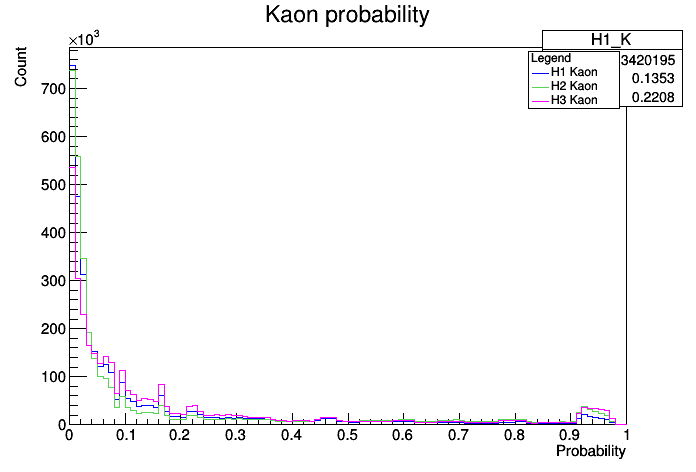

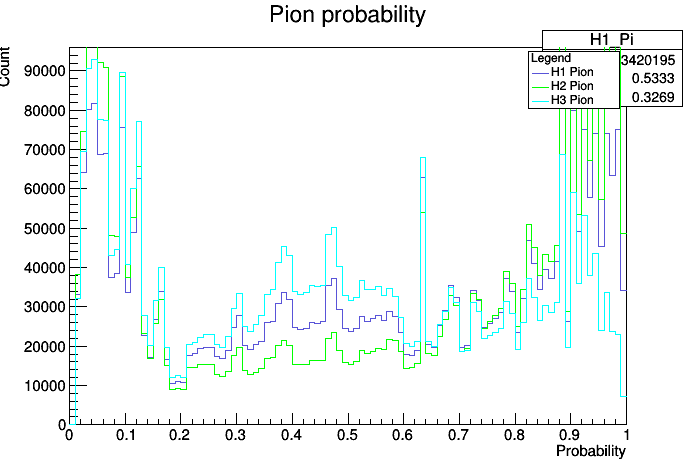

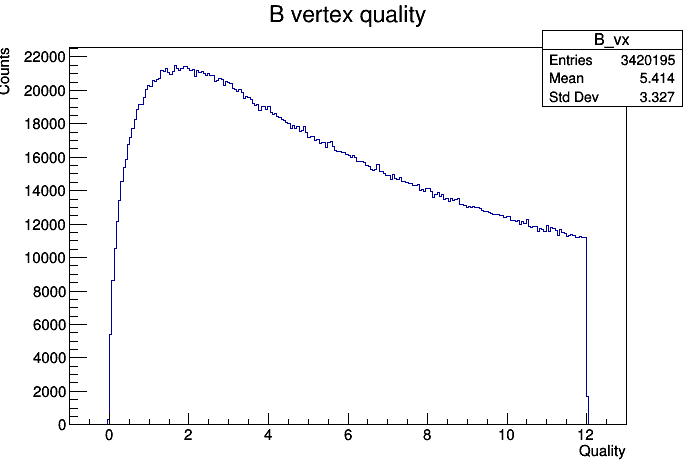

In [ ]:
#Make plots of H1/H2/H3 _ProbK on one plot

c3 = ROOT.TCanvas("canvas3")
tree.Draw("H1_ProbK>>H1_K(100, 0, 1)")
H1_K = ROOT.gDirectory.Get("H1_K")
tree.Draw("H2_ProbK>>H2_K(100, 0, 1)")
H2_K = ROOT.gDirectory.Get("H2_K")
tree.Draw("H3_ProbK>>H3_K(100, 0, 1)")
H3_K = ROOT.gDirectory.Get("H3_K")

H1_K.Draw()
H2_K.Draw("same")
H3_K.Draw("same")
H1_K.SetLineColor(4)
H2_K.SetLineColor(8)
H3_K.SetLineColor(6)


H1_K.SetTitle("Kaon probability")
H1_K.SetXTitle("Probability")
H1_K.SetYTitle("Count")

leg = ROOT.TLegend(0.11 + 0.65, 0.77, 0.3 + 0.59, 0.89) 
leg.SetHeader("Legend")
leg.AddEntry(H1_K, "H1 Kaon", "l")
leg.AddEntry(H2_K, "H2 Kaon", "l")
leg.AddEntry(H3_K, "H3 Kaon", "l")
leg.Draw("same")
c3.Draw()

#Graph the probability of all three particles on the same graph

c4 = ROOT.TCanvas("canvas4")
tree.Draw("H1_ProbPi>>H1_Pi(100, 0, 1)")
H1_Pi = ROOT.gDirectory.Get("H1_Pi")
tree.Draw("H2_ProbPi>>H2_Pi(100, 0, 1)")
H2_Pi = ROOT.gDirectory.Get("H2_Pi")
tree.Draw("H3_ProbPi>>H3_Pi(100, 0, 1)")
H3_Pi = ROOT.gDirectory.Get("H3_Pi")

H1_Pi.Draw()
H2_Pi.Draw("same")
H3_Pi.Draw("same")
H1_Pi.SetLineColor(9)
H2_Pi.SetLineColor(3)
H3_Pi.SetLineColor(7)
H1_Pi.SetTitle("Pion probability")
H1_Pi.SetXTitle("Probability")
H1_Pi.SetYTitle("Count")
leg1 = ROOT.TLegend(0.11 + 0.65, 0.77, 0.3 + 0.59, 0.89) 
leg1.SetHeader("Legend")
leg1.AddEntry(H1_Pi, "H1 Pion", "l")
leg1.AddEntry(H2_Pi, "H2 Pion", "l")
leg1.AddEntry(H3_Pi, "H3 Pion", "l")
leg1.Draw("same")

c4.Draw()


#The same for vertex quality

c5 = ROOT.TCanvas("canvas5")
tree.Draw("B_VertexChi2>>B_vx(250, -1, 13)")
B_vx = ROOT.gDirectory.Get("B_vx")
B_vx.SetTitle("B vertex quality")
B_vx.SetXTitle("Quality")
B_vx.SetYTitle("Counts")
c5.Draw()

In [ ]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon 
#selection=("H1_ProbPi>0.9&H2_ProbPi>0.9&H3_ProbPi>0.9&!H1_isMuon&H2_isElectron&H3_isElephant") 

In [ ]:
selection=("H1_ProbK>H1_ProbPi&&!H1_isMuon&H1_ProbK>0.2&&H2_ProbK>H2_ProbPi&&!H2_isMuon&H2_ProbK>0.2&&H3_ProbK>H3_ProbPi&&!H3_isMuon&H3_ProbK>0.2")
# I originally had it as H1,2,3_ProbPi>0.2 in the code above, as that is how I understood it would work but I recieved no data on the graph below so I switched it to ProbK>0.2...which works
CutTree=tree.CopyTree(selection)
#This line tells our code to cut the data that does not belong to this selection

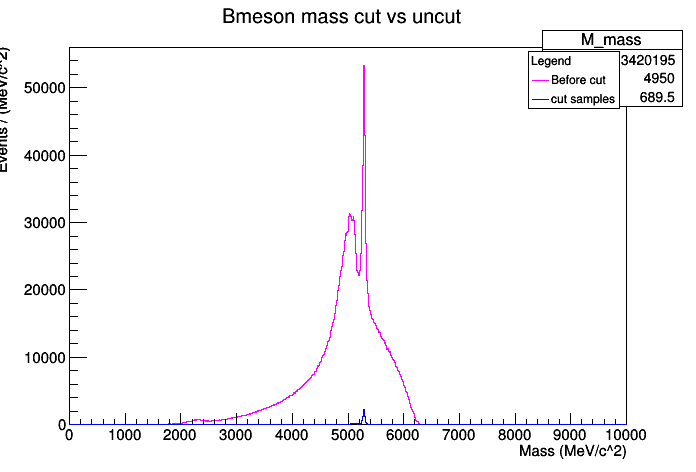

In [ ]:
c6 = ROOT.TCanvas("canvas6")
tree.Draw("M_m0>>M_mass(1000, 0, 10000)")
M_mass = ROOT.gDirectory.Get("M_mass")

CutTree.Draw("M_m0>>M_masscut(1000, 0, 10000)")
M_masscut = ROOT.gDirectory.Get("M_masscut")
M_mass.Draw()
M_masscut.Draw("same")
M_mass.SetLineColor(6)
M_masscut.SetLineColor(4)
M_mass.SetTitle("Bmeson mass cut vs uncut")
M_mass.SetXTitle("Mass (MeV/c^2)")
M_mass.SetYTitle("Events / (MeV/c^2)")
leg2 = ROOT.TLegend(0.11 + 0.65, 0.77, 0.3 + 0.59, 0.89) 
leg2.SetHeader("Legend")
leg2.AddEntry(M_mass, "Before cut", "l")
leg2.AddEntry(M_masscut, "cut samples", "l")
leg2.Draw("same")

c6.Draw()

Coments about the cut sample: the mass range has been dramatically narrowed and also the number of viable events has decreased massively.

Counting the number of events

In [ ]:
#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("M_m0","Mass",5060,5600,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean",5280,5200,5360)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)

#Choose the model for the signal

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries(), 0, tree.GetEntries())
#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exponent", "C", -0.02, -10, +10)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries(), 0, tree.GetEntries())

#Define the backround model

Bknd=ROOT.RooExponential("Exponential Background","Bknd",mass,exponent)

mean = ROOT.RooRealVar('mean', '', 5280, 5200, 5360)
width = ROOT.RooRealVar('sigma', '', 10, 0, 30)
alpha = ROOT.RooRealVar('alpha', '', 1, 0, 10)
n = ROOT.RooRealVar('n', '', 3, 0, 20)
CV=ROOT.RooChebychev()
CV_Norm= ROOT.RooRealVar("CV_Norm","Background Yield", tree.GetEntries(), 0, tree.GetEntries())

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bknd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )
model1=ROOT.RooAddPdf("Full Model","model1",ROOT.RooArgList(CV,Bknd),ROOT.RooArgList(CV_Norm, exp_Norm) )

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 3600 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   3.42020e+06  3.42020e+05    0.00000e+00  3.42020e+06
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 IS AT ITS UPPER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUG

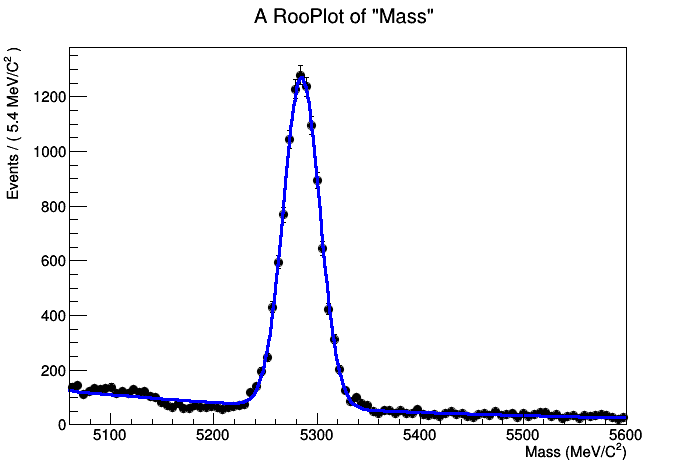

In [ ]:
#GAUSSIAN AND EXPONENTIAL FIT

#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below


#Now to plot it all
c7=ROOT.TCanvas("c7","c7")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("BkgndExp"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c7.Draw()

Now we wil do a Gauss + Chebychev

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 3600 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (CV,Gaussian Signal)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 CV_Norm      3.42020e+06  3.42020e+05    0.00000e+00  3.42020e+06
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 IS AT ITS UPPER ALLOWED LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUGHT BACK INSIDE LIMIT

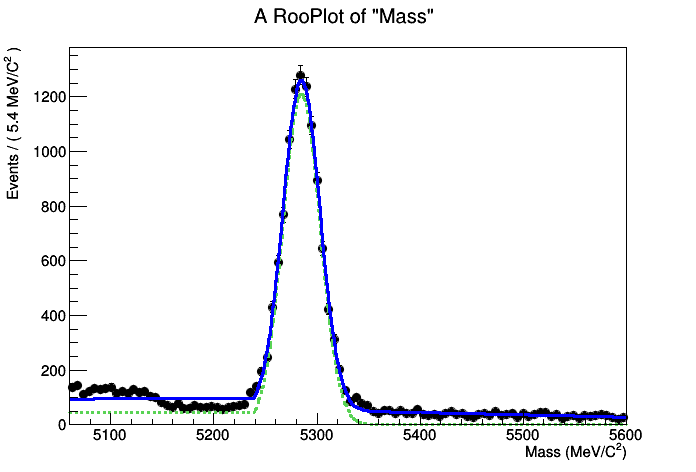

In [ ]:
#Chebychev Signal

mean = ROOT.RooRealVar('mean', '', 5280, 5200, 5360)
width = ROOT.RooRealVar('sigma', '', 10, 0, 30)
alpha = ROOT.RooRealVar('alpha', '', 1, 0, 10)
n = ROOT.RooRealVar('n', '', 3, 0, 20)

CV=ROOT.RooCBShape("CV", "CV",mass, mean, width, alpha, n)
CV_Norm= ROOT.RooRealVar("CV_Norm","Background Yield", tree.GetEntries(), 0, tree.GetEntries())


model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bknd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )
model1=ROOT.RooAddPdf("Full Model","model1",ROOT.RooArgList(CV,Gauss),ROOT.RooArgList(CV_Norm, Gauss_Norm) )
data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", CutTree, ROOT.RooArgSet(mass))
model1.fitTo(data_to_fit)

c9=ROOT.TCanvas("c9","c9")
frame1=mass.frame()
data_to_fit.plotOn(frame1)
model1.plotOn(frame1, ROOT.RooFit.Components("CV"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model1.plotOn(frame1, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model1.plotOn(frame1)
frame1.Draw()
c9.Draw()


Finding errors, means and Chi^2 tests for both tests

In [ ]:
GaussErr=Gauss_Norm.getError()
GaussNorm=Gauss.getValV()
GaussMean=mean.getValV()
ExpErr=exp_Norm.getError()
ExpNorm=exponent.getValV()
CV_Norm=CV.getValV()
CVerr=CV_Norm.getError()
#I cannot fix this issue I feel it has something to do with where I have defined a signal earlier.
CVmean=mean.getValV()
GaussChi=frame.chiSquare()
CVchi=frame1.chiSquare()

print("For the gaussian and exponential fit, the gaussian normalisation was "+ str(GaussNorm) + " with an error of " + str(GaussErr) + "and the exponential normalisation was "+ str(ExpNorm) + " with an error of " + str(ExpErr))
print("For the Gauss and Chebychev fit, the normalization was "+ str(CV_Norm) + " with an error of " + str(CVerr) + " and the Gaussian normalisation was "+ str(Gauss_Norm) + " with an error of " + str(GaussErr))
print("The chi squared of the gaussian is: " +str(GaussChi)+ ". The chi squared of the Chebychev is: "+ str(CVchi))
print("Method 1 had a mean of " + str(GaussMean) + ", Method 2 had a mean of " + str(CVmean) + "MeV/C^2.")

AttributeError: ignored

Both Methods resulted in the exact same mean values for the mass of the B meson

COUNTING:



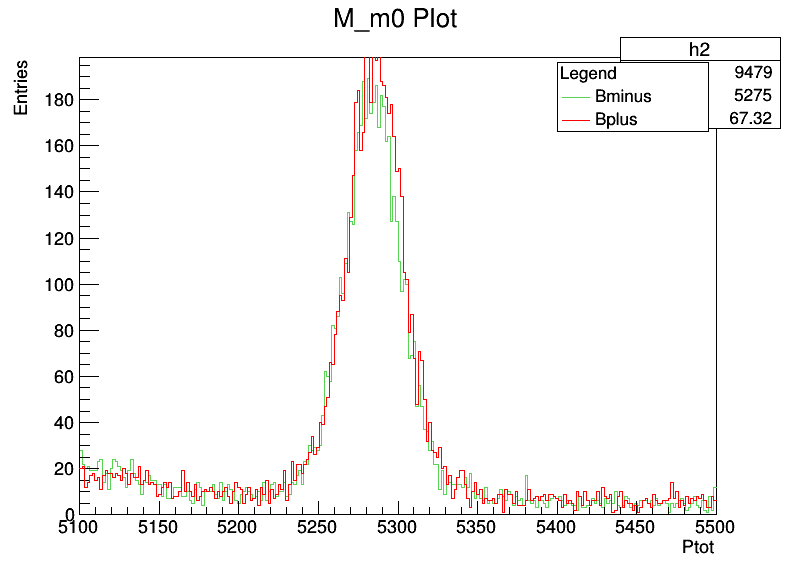

In [ ]:
#Here we make a selection to count each Bminus or Bplus entry


Bminuscut = ("H1_Charge+H2_Charge+H3_Charge == -1")
Bpluscut = ("H1_Charge+H2_Charge+H3_Charge == 1")
BminusTree = CutTree.CopyTree(Bminuscut)
BplusTree = CutTree.CopyTree(Bpluscut)

c10 = ROOT.TCanvas("c10", "c10", 800, 600)
BplusTree.Draw("M_m0>>h1(250, 5100, 5500)")
h1 = ROOT.gDirectory.Get("h1")
BminusTree.Draw("M_m0>>h2(250, 5100, 5500)")
h2 = ROOT.gDirectory.Get("h2")
h2.SetTitle("M_m0 Plot")
h2.GetXaxis().SetTitle("Ptot")
h2.GetYaxis().SetTitle("Entries")
h2.SetLineColor(8) 
h2.SetLineWidth(1)
h1.SetLineColor(2) 
h1.SetLineWidth(1)
h2.Draw()
h1.Draw("same")

leg = ROOT.TLegend(0.11 + 0.59, 0.77, 0.3 + 0.59, 0.89)
leg.SetHeader("Legend")
leg.AddEntry(h2, "Bminus", "l")
leg.AddEntry(h1, "Bplus", "l")

leg.Draw("same")
c10.Draw()

Normalisation, error, and Chi squared, respectively: 5163.47399177, 77.5466690674, 50.0323002314
[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 1902 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **   37 **SET PRINT           1
 **********
 **********
 **   38 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   3.42020e+06  3.42020e+05    0.00000e+00  3.42020e+06
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 IS AT ITS UPPER ALLO

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c11


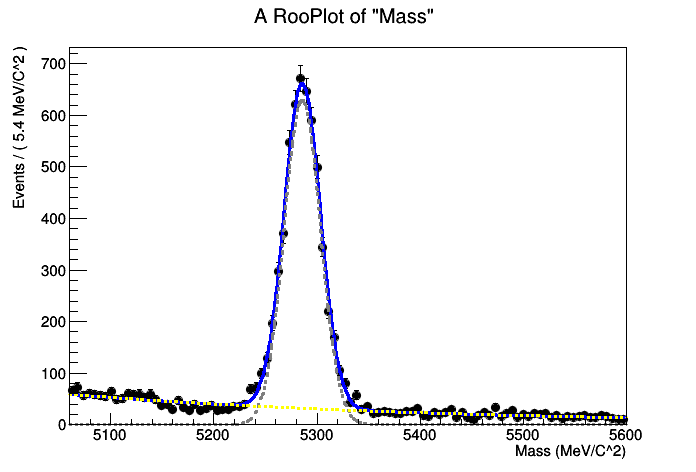

In [ ]:
#The values concerning Bplus

mass = ROOT.RooRealVar("M_m0","Mass",5060,5600,"MeV/C^2")
gaussMean = ROOT.RooRealVar("Mean","Mean",5280,5060,5600)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)
Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries(), 0, tree.GetEntries() )
exponent=ROOT.RooRealVar("exponent", "C", -0.1, -50, +50)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries(), 0, tree.GetEntries() )
Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)
model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )
data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", BplusTree, ROOT.RooArgSet(mass))
model.fitTo(data_to_fit)

c11=ROOT.TCanvas("c11","c11")
frame2=mass.frame()
data_to_fit.plotOn(frame2)
model.plotOn(frame2)
model.plotOn(frame2, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(14),ROOT.RooFit.LineStyle(2))
model.plotOn(frame2, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(5),ROOT.RooFit.LineStyle(2))
frame2.Draw()

c11.Draw()

BplusNorm = Gauss_Norm.getValV()
BplusError = Gauss_Norm.getError()
BpluChi2 = frame2.chiSquare()

print("Normalisation, error, and Chi squared, respectively: " +str(BplusNorm)+", "+str(BplusError)+", "+str(BpluChi2))


 Normalisation, error, and Chi squared, respectively: 4697.98653999, 74.1009171036, 45.6784294259
[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(Data Set) Ignored 1698 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **   46 **SET PRINT           1
 **********
 **********
 **   47 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   3.42020e+06  3.42020e+05    0.00000e+00  3.42020e+06
 MINUIT WARNING IN PARAM DEF
 ============== STARTING VALUE IS AT LIMIT.
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 IS AT ITS UPPER ALL

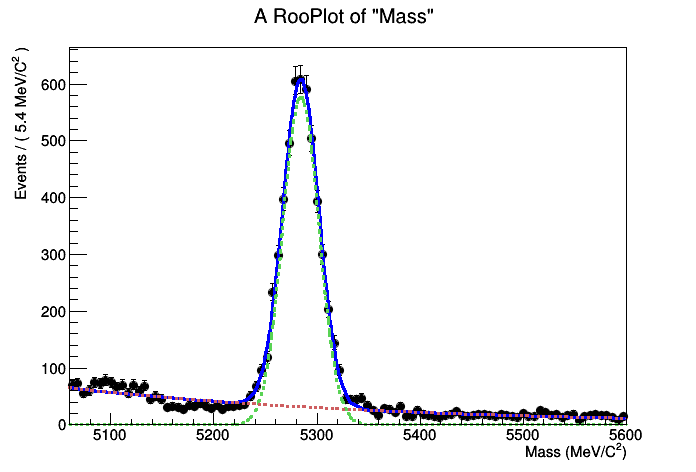

In [ ]:
#The values concerning Bminus
mass = ROOT.RooRealVar("M_m0","Mass",5060,5600,"MeV/C^{2}")

gaussMean = ROOT.RooRealVar("Mean","Mean",5300,5060,5630)
gaussWidth = ROOT.RooRealVar("Width","Width",40,0,7000)
Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries(),0, tree.GetEntries() )
exponent=ROOT.RooRealVar("exponent", "C", -0.1, -2, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries(), 0, tree.GetEntries())
Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)
model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )
data_to_fit=ROOT.RooDataSet("Data Set","data_to_fit", BminusTree, ROOT.RooArgSet(mass))
model.fitTo(data_to_fit)

c12=ROOT.TCanvas("c12","c12")
frame3=mass.frame()
data_to_fit.plotOn(frame3)
model.plotOn(frame3)
model.plotOn(frame3, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame3, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
frame3.Draw()
c12.Draw()
BminusNorm = Gauss_Norm.getValV()
BminusError = Gauss_Norm.getError()
BminusChi2 = frame3.chiSquare()

print(" Normalisation, error, and Chi squared, respectively: " +str(BminusNorm)+", "+str(BminusError)+", "+str(BminusChi2))

In [ ]:

import math
Assym = (BminusNorm - BplusNorm)/(BminusNorm + BplusNorm)
Assym_err = math.sqrt((1-Assym**2)/(BminusNorm + BplusNorm))


print("A = " + str(Assym) + " +- " + str(Assym_err))